In [1]:
library(Seurat)
library(Azimuth)
library(SeuratData)
library(SeuratDisk)
library(Signac)
library(EnsDb.Hsapiens.v86)
library(dplyr)
library(ggplot2)
library(stringr)
library(patchwork)
options(timeout=600)
options(future.globals.maxSize = 8000 * 1024^2)

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.11.0-CAPI-1.17.0
and GEOS at installation 3.10.2-CAPI-1.16.0differ”
Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching shinyBS

── Installed datasets ─────────────────────────────────────────────────────────────────────────────────────────────────────────── SeuratData v0.2.2 ──

✔ bonemarrowref  1.0.0                                                     ✔ lungref        2.0.0
✔ fetusref       1.0.0                                                     ✔ pancreasref    1.0.0
✔ humancortexref 1.0.0                                                     ✔ pbmcref        1.0.0
✔ kidneyref      1.0.1                                                     ✔ thp1.eccite    3.1.5


───────────────────────────────────────────────────────────────────────── Key ─────────────────────────────────────────────────────────────────────

In [2]:
# My parameters
h5_name = "/home/vsevim/prj/tf/CATATAC_4/analysis/secondary/TF2CRISPR2/seurat/CATATAC_4_TF2CRISPR2_ONLY_SINGLETS.h5seurat"
h5_w_gcap_name <- sub(".h5seurat", "_w_GUIDE_CAP.h5seurat", h5_name)
protosp_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/TF2CRISPR2/resources/protospacers_TF2.csv"
azimuth_output_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/TF2CRISPR2/azimuth/"
library = "TF2CRISPR2"
tsv_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/TF2CRISPR2/tsv"
mx_path = "/home/vsevim/prj/tf/CATATAC_4/analysis/primary/TF2CRISPR2/cellranger/outs/filtered_feature_bc_matrix.h5"

# Load protospacer file

In [3]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")

In [4]:
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "OTP"   "MYF6"  "MEIS1" "FLI1"  "HHEX"  "HOXA6" "ELF5"  "GBX1"  "DPRX"

[1] "OTP_1"   "OTP_2"   "MYF6_1"  "MYF6_2"  "MEIS1_1" "MEIS1_2" "FLI1_1" 
 [8] "FLI1_2"  "HHEX_1"  "HHEX_2"  "HOXA6_1" "HOXA6_2" "ELF5_1"  "ELF5_2" 
[15] "GBX1_1"  "GBX1_2"  "DPRX_1"  "DPRX_2"  "NTCTL_1" "NTCTL_2"

# Load Seurat object

In [5]:
seurat_all <- LoadH5Seurat(h5_w_gcap_name)

Validating h5Seurat file

Initializing ATAC with data

Adding counts for ATAC

Adding feature-level metadata for ATAC

Adding variable feature information for ATAC

Adding miscellaneous information for ATAC

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Initializing SCT with data

Adding counts for SCT

Adding scale.data for SCT

Adding variable feature information for SCT

Adding miscellaneous information for SCT

Initializing guidecapture with data

Adding counts for guidecapture

Adding miscellaneous information for guidecapture

Adding reduction lsi

Adding cell embeddings for lsi

Adding feature loadings for lsi

Adding miscellaneous information for lsi

Adding reduction umap.atac

Adding cell embeddings for umap.atac

Adding miscellaneous information for umap.atac

Adding reduction wnn.umap

Adding cell embeddings for wnn.umap

Adding miscellaneous information for wnn.umap

Adding reduction pca

Adding cell embeddings for pca

Adding

In [22]:
head(seurat)

,nCount_ATAC,nFeature_ATAC,nCount_RNA,nFeature_RNA,nCount_guidecapture,nFeature_guidecapture,orig.ident,percent.mt,nucleosome_signal,nucleosome_percentile,⋯,seurat_clusters,SCT.weight,ATAC.weight,wsnn_res.0.8,guidecapture_maxID,guidecapture_secondID,guidecapture_margin,guidecapture_classification,guidecapture_classification.global,hash.ID
,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<fct>
AAACAGCCAATGCCCG-1,42843,18873,14949,5361,4,1,CATATAC_CATATAC_4_TF2CRISPR2,8.181149,0.6574874,0.16,⋯,3,0.5000000,0.5000000,3,MYF6,OTP,1.19040650,Negative,Negative,Negative
AAACAGCCACAGCCAT-1,12111,5983,8026,3996,34,2,CATATAC_CATATAC_4_TF2CRISPR2,7.251433,0.6339678,0.11,⋯,3,0.5510563,0.4489437,3,HHEX,MYF6,0.74417744,HHEX_MYF6,Doublet,Doublet
AAACAGCCACAGCCTG-1,22314,10678,7814,3740,8,1,CATATAC_CATATAC_4_TF2CRISPR2,11.479396,0.8499184,0.79,⋯,2,0.4532063,0.5467937,2,NTCTL,OTP,1.96425867,NTCTL,Singlet,NTCTL
AAACAGCCATGCTTAG-1,42055,19469,28395,7325,117,3,CATATAC_CATATAC_4_TF2CRISPR2,9.667195,0.9149119,0.90,⋯,17,0.6278106,0.3721894,17,ELF5,HOXA6,2.17075797,ELF5_HOXA6,Doublet,Doublet
AAACATGCAAGCTTAT-1,18457,9021,5806,2934,4,1,CATATAC_CATATAC_4_TF2CRISPR2,9.524630,0.9324468,0.92,⋯,3,0.5271825,0.4728175,3,NTCTL,OTP,1.40236764,NTCTL,Singlet,NTCTL
AAACATGCAGGCTTGT-1,18312,9149,4579,2539,7,1,CATATAC_CATATAC_4_TF2CRISPR2,11.792968,0.8857778,0.86,⋯,13,0.5222274,0.4777726,13,OTP,MYF6,1.93517989,OTP,Singlet,OTP
AAACATGCATCACAGC-1,25017,11679,11298,4883,4,1,CATATAC_CATATAC_4_TF2CRISPR2,12.648256,0.9071887,0.89,⋯,2,0.5193146,0.4806854,2,MYF6,OTP,1.19040650,Negative,Negative,Negative
AAACCAACAAGTGTCC-1,5195,2741,8591,3724,16,1,CATATAC_CATATAC_4_TF2CRISPR2,8.182982,0.6359584,0.11,⋯,12,0.5000000,0.5000000,12,MYF6,OTP,2.31783528,MYF6,Singlet,MYF6
AAACCAACAGGAACAT-1,6868,3478,5773,3056,12,2,CATATAC_CATATAC_4_TF2CRISPR2,12.038801,0.8228188,0.73,⋯,9,0.7009409,0.2990591,9,DPRX,FLI1,0.02503582,DPRX_FLI1,Doublet,Doublet


# Install data sets

In [6]:
#seurat <- RunAzimuth(seurat, umap.name='umap.rna', reference = "pbmcref")

In [7]:
#p1 <- DimPlot(seurat, group.by = "predicted.celltype.l2", label = TRUE, label.size = 5) + NoLegend()
#p2 <- DimPlot(seurat, group.by = "Method")
#p1

In [8]:
available_data <- AvailableData()
datasets = available_data[grep("Azimuth", available_data[, 3]), 1:3]$Dataset
human_datasets = datasets[-6]
human_datasets

[1] "adiposeref"     "bonemarrowref"  "fetusref"       "heartref"      
 [5] "humancortexref" "lungref"        "mousecortexref" "pancreasref"   
 [9] "pbmcref"        "tonsilref"

In [9]:
#for(dataset in human_datasets) {
dataset = 'fetusref'
reduction_name = paste0("azimuth.umap.", dataset)
seurat <- RunAzimuth(mx_path, umap.name = reduction_name, reference = dataset, verbose=FALSE)

Genome matrix has multiple modalities, returning a list of matrices for this genome



An AzimuthData object - reference version: 1.0.0 
Contains 3 meta.data field(s) to transfer.

Warning message:
"Overwriting miscellanous data for model"
detected inputs from HUMAN with id type Gene.name

reference rownames detected HUMAN with id type Gene.name

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscoreannotation.l1_ to predictionscoreannotationl1_"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from predictionscoreannotation.l2_ to predictionscoreannotationl2_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from integrated_dr_ to integrateddr_"
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring s

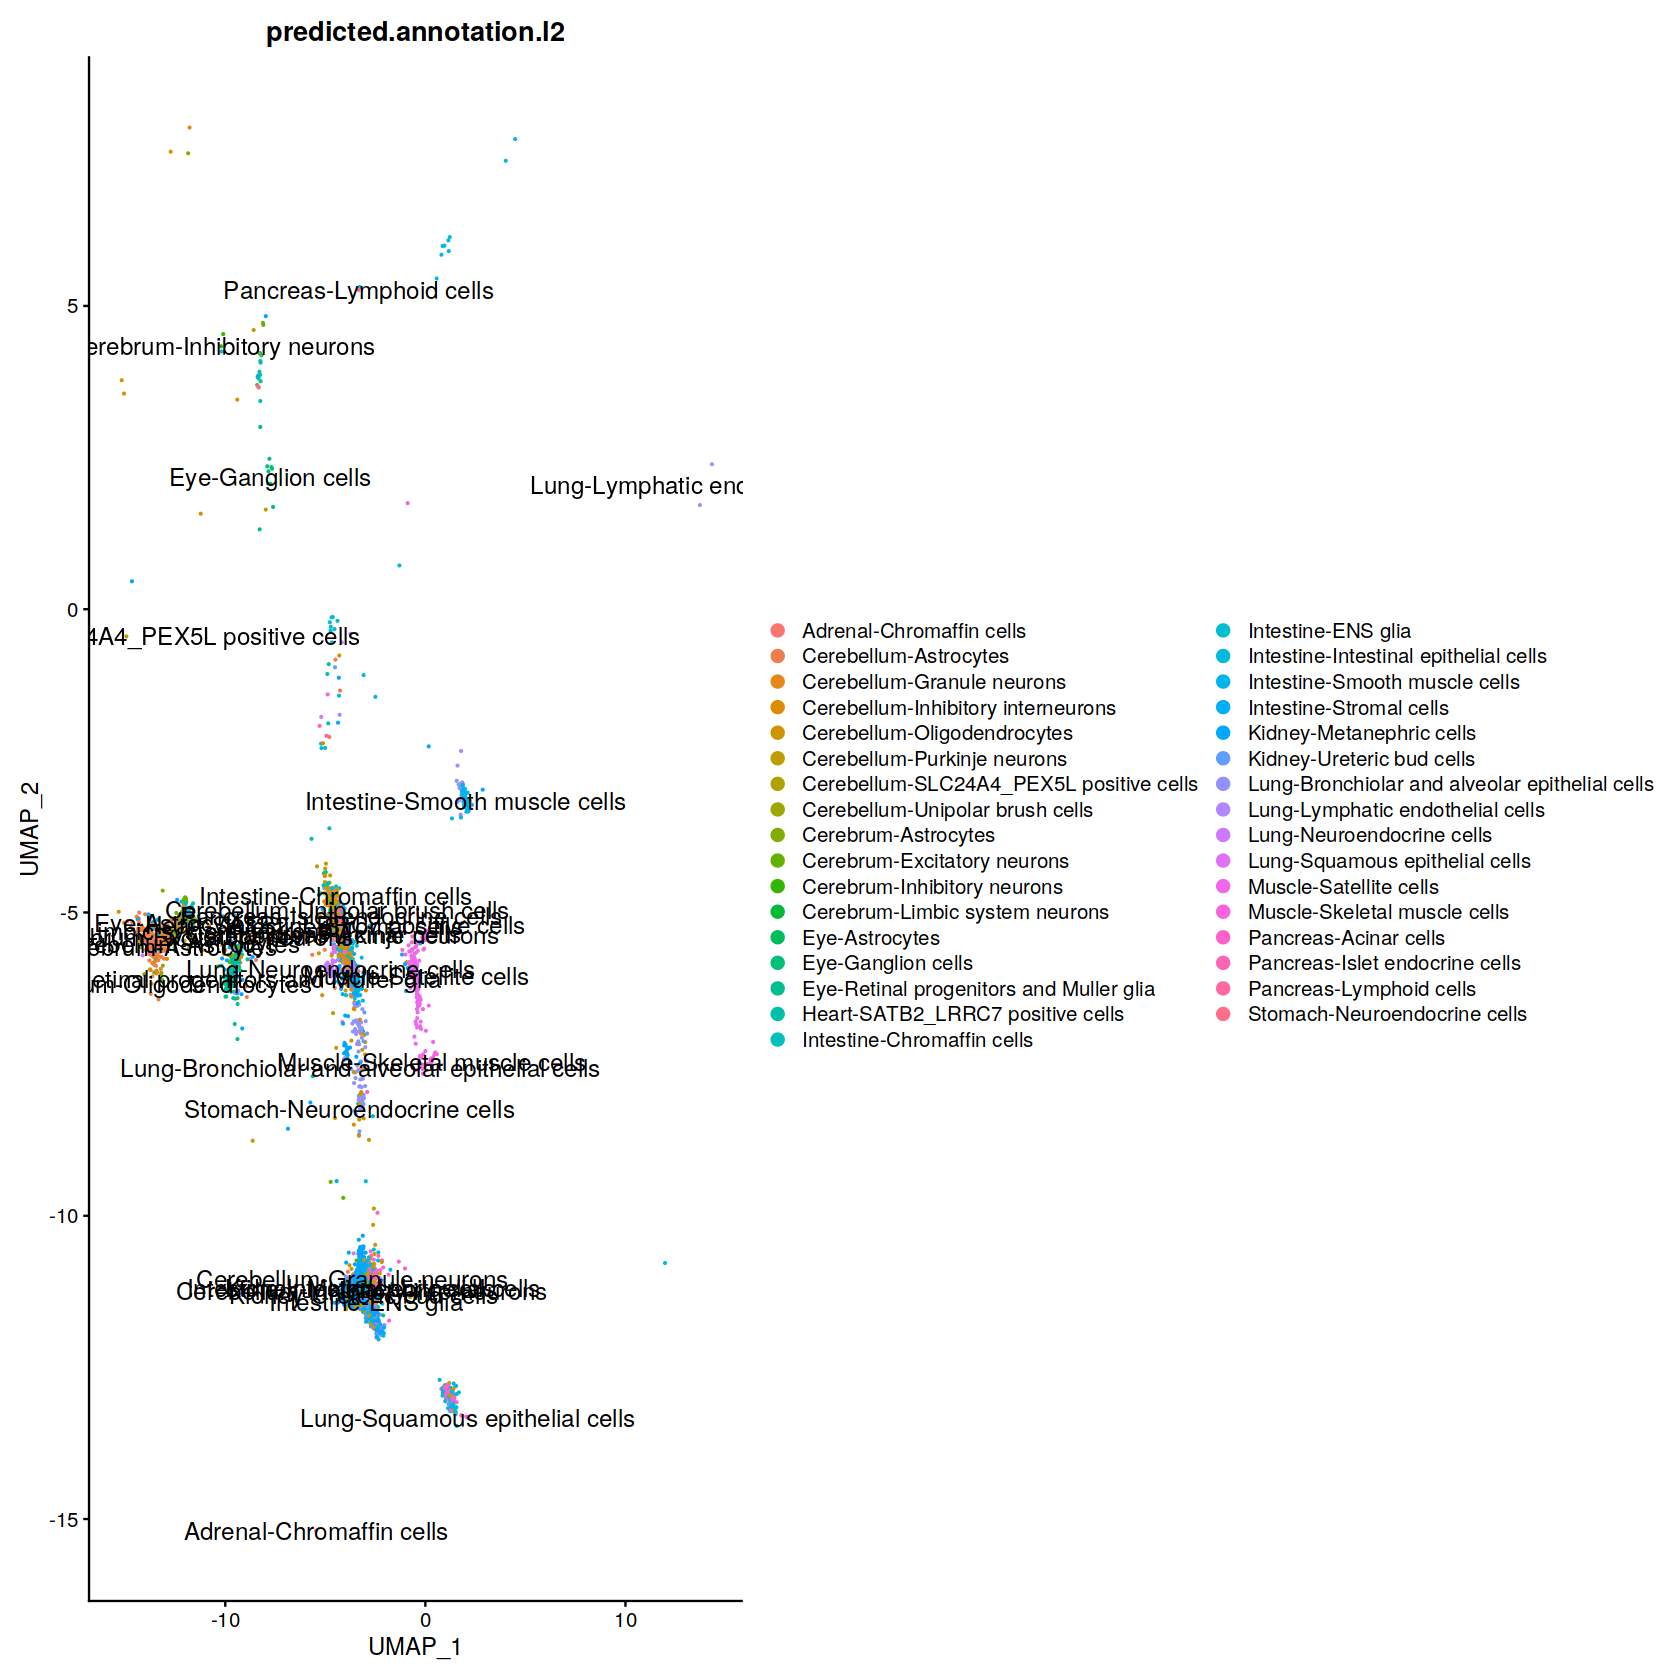

In [10]:
options(repr.plot.width=14, repr.plot.height=14)
DimPlot(seurat, reduction = reduction_name, group.by = "predicted.annotation.l2", label = TRUE, label.size = 5)
#p2 <- FeaturePlot(seurat, reduction = reduction_name, features = "predictionscorecelltypel2_Treg")

In [20]:
seurat <- SetIdent(seurat_all, value = seurat_all@meta.data$seurat_clusters)
seurat <- RenameIdents(seurat, '5' = 'iPSC')
seurat <- RenameIdents(seurat, '8' = 'MEIS1')
seurat <- RenameIdents(seurat, '17' = 'ELF5')
seurat <- RenameIdents(seurat, '13' = 'OTP')
seurat <- RenameIdents(seurat, '12' = 'MYF6')

In [27]:
options(repr.plot.width=54, repr.plot.height=24)
seurat_subset = subset(seurat, guidecapture_classification %in% c("MYF6", "MEIS1"))
#DimPlot(seurat_subset, reduction = reduction_name, split.by = 'guidecapture_classification', group.by = "predicted.annotation.l2", label = TRUE, label.size = 5)
DimPlot(seurat_subset, reduction = reduction_name, split.by = 'guidecapture_classification', label = TRUE, label.size = 5)

ERROR: Error: Cannot find 'azimuth.umap.fetusref' in this Seurat object


In [13]:
options(repr.plot.width=14, repr.plot.height=7)
seurat_subset = subset(seurat, guidecapture_classification.global == "Singlet")
VlnPlot(seurat_subset, split.by = 'guidecapture_classification', features = "predicted.annotation.l2.score")

ERROR: Error in FetchData.Seurat(object = object, vars = unique(x = expr.char[vars.use]), : None of the requested variables were found: 


In [ ]:
options(repr.plot.width=24, repr.plot.height=8)

In [14]:
options(repr.plot.width=12, repr.plot.height=8)

for(tf in tfs_to_plot){
    df_table = as.data.frame(table(seurat_subset$predicted.annotation.l2))
    seurat_subset = subset(seurat, guidecapture_classification == tf)
    plt <- ggplot(df_table, aes(x=Var1, y=Freq)) + 
        geom_bar(stat='identity') + 
        ggtitle(tf) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=14), plot.title = element_text(size=16)) 
    print(plt)
}

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.data.frame': object 'seurat_subset' not found
